In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/drive/notebooks/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
df1 = df.drop(['Cabin','Fare'],axis=1)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,S


In [16]:
df1.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

In [17]:
df1['Age'] = df1['Age'].fillna(df['Age'].median())

In [18]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df1.columns:
    df1[i] = enc.fit_transform(df[i])
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,0,2,206,1,44,0,0,152,1
1,1,1,2,403,0,60,1,0,221,2
2,2,0,1,269,1,74,0,0,73,1
3,3,0,2,408,1,34,0,0,147,2
4,4,1,2,178,0,27,1,1,138,2
...,...,...,...,...,...,...,...,...,...,...
413,413,0,2,353,1,79,0,0,267,2
414,414,1,0,283,0,51,0,0,324,0
415,415,0,2,332,1,50,0,0,346,2
416,416,0,2,384,1,79,0,0,220,2


In [20]:
from sklearn.model_selection import train_test_split
x = df1.drop(['Survived'],axis=1)
y = df1['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=156)

In [22]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression(max_iter=1000)
result = my_model.fit(X_train,Y_train)

In [23]:
predictions = result.predict(X_test)
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int32)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

1.0

In [26]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test,predictions)
confusion_df = pd.DataFrame(confusion_mat,index = ['Actualneg','Actualpos'], columns=['Predictedneg','Predictedpos'])
confusion_df

,Predictedneg,Predictedpos
Actualneg,55,0
Actualpos,0,29


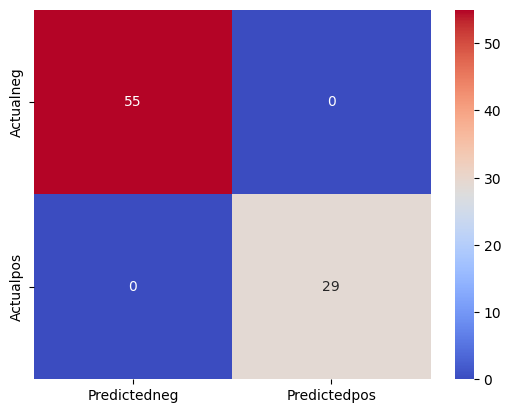

In [48]:
import seaborn as sns
color_conf_matrix = sns.heatmap(confusion_df,cmap='coolwarm',annot=True)

In [49]:
pred_new = result.predict([[100,2,301,1,50,0,0,200,2]])
pred_new

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int32)